In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [32]:
df.sample(5)

,cgpa,placement_exam_marks,placed
581,6.57,25.0,0
195,6.71,44.0,0
76,8.35,12.0,0
857,5.72,64.0,1
869,5.51,58.0,1


C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_12812\1444033.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_12812\1444033.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


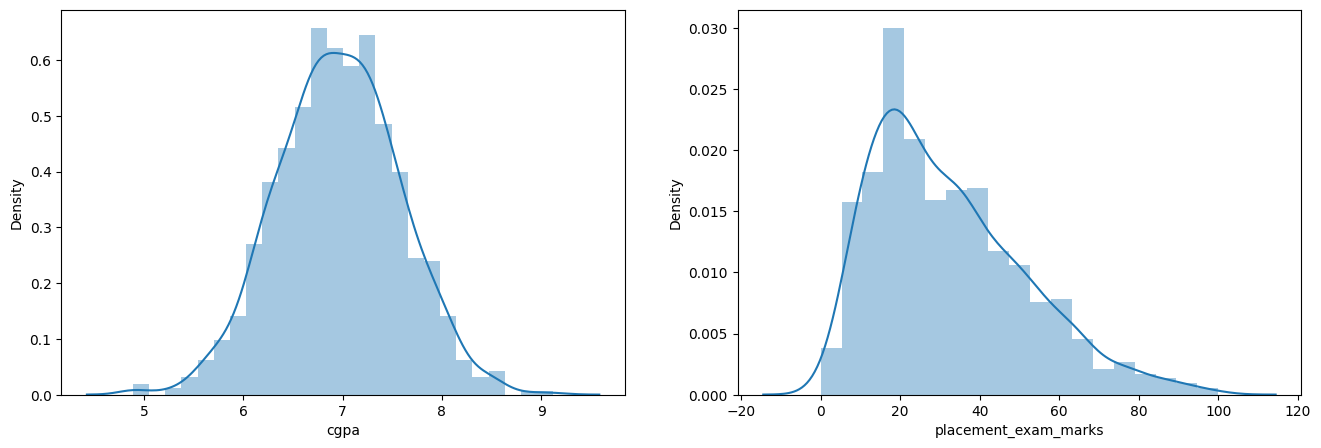

In [33]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

 # placement_exam_marks is skewed so we apply boxplot and IQR on it

In [34]:
df['cgpa'].skew()

-0.014529938929314918

In [35]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

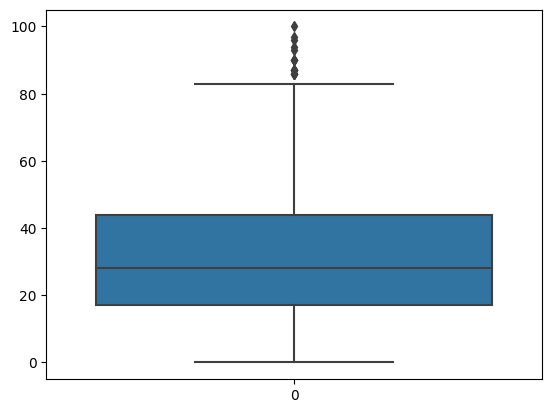

In [36]:
sns.boxplot(df['placement_exam_marks'])

In [37]:
# finding IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [38]:
percentile25 , percentile75

(17.0, 44.0)

In [39]:
iqr=percentile75-percentile25 
iqr

27.0

In [40]:
ul=percentile75 + 1.5*iqr
ll=percentile25 - 1.5*iqr
print("upper limit:",ul)
print('lower limit:',ll)

upper limit: 84.5
lower limit: -23.5


## finding outliers

In [41]:
df[df["placement_exam_marks"]>ul]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [42]:
df[df['placement_exam_marks']<ll]

,cgpa,placement_exam_marks,placed


## trimming

In [43]:
new_df=df[df['placement_exam_marks']<ul]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [44]:
new_df.shape

(985, 3)

C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_12812\3106396184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_12812\3106396184.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


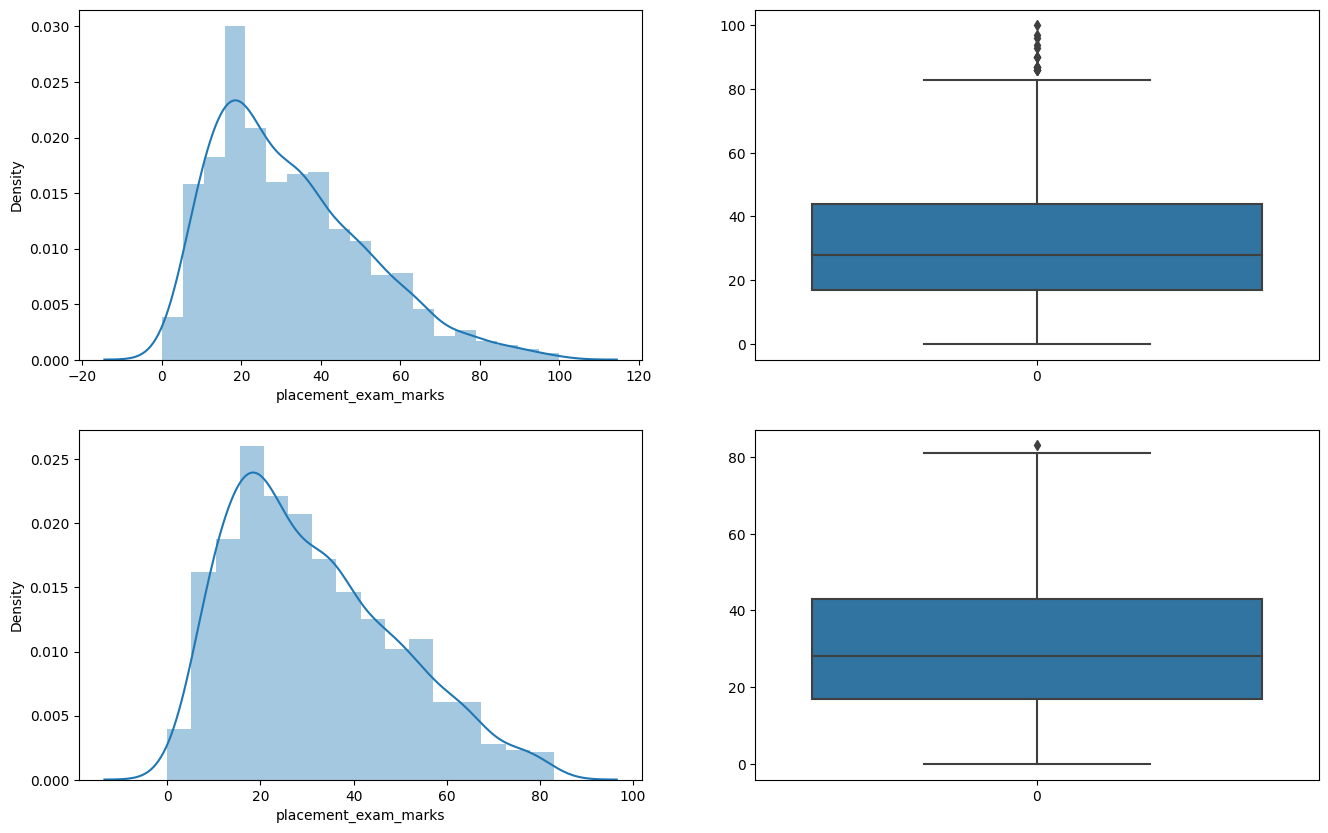

In [45]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks']) 

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks']) 

plt.show()

## capping

In [47]:
## np.where(x,y,z) 
# x-condition y-action when condition true
#z - action when condition false
new_df_cap=df.copy()
new_df_cap['placement_exam_marks']=np.where(
    df['placement_exam_marks']>ul,
    ul,
    np.where(
    df['placement_exam_marks']<ll,
    ll,
    df['placement_exam_marks']
    
    )
)


In [49]:
new_df_cap.shape

(1000, 3)

In [50]:
new_df_cap['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_12812\1847843788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_12812\1847843788.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


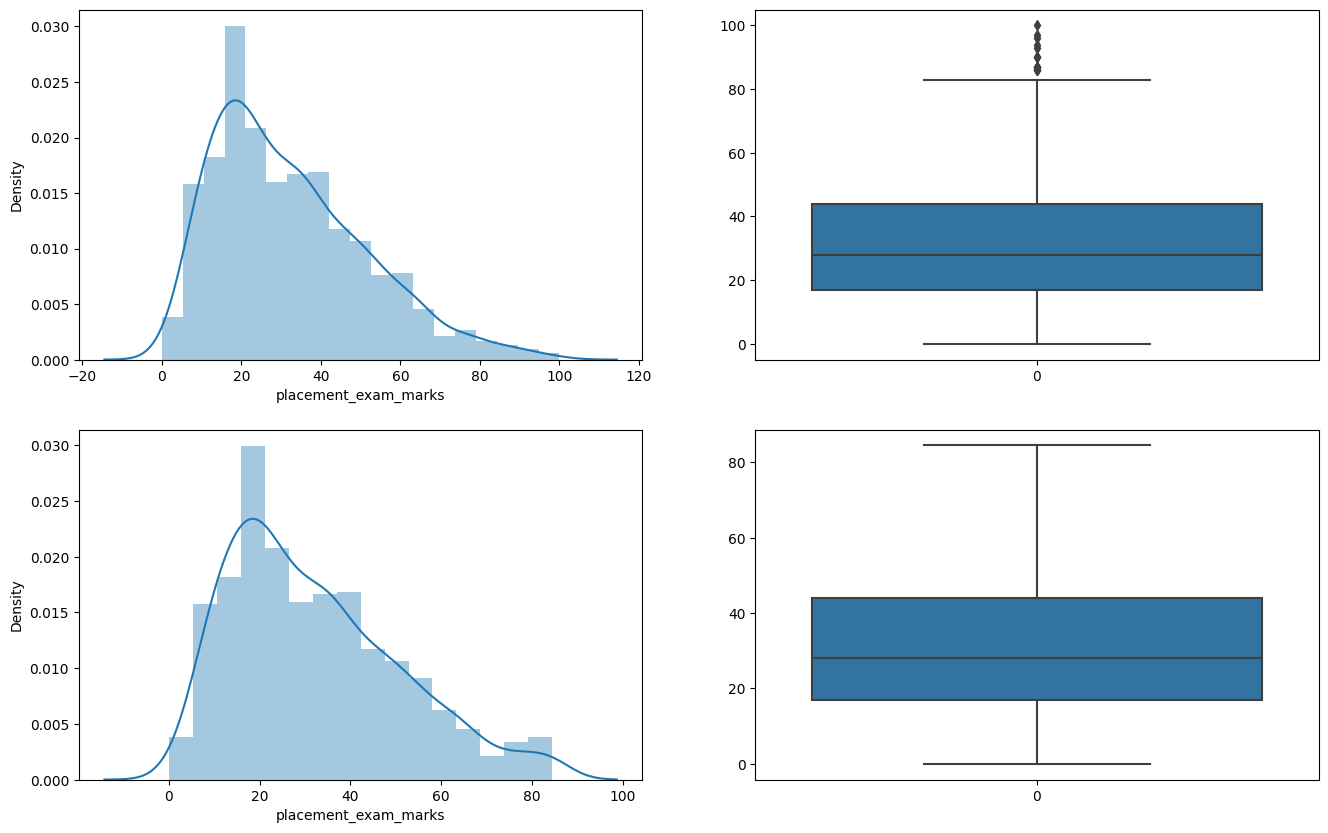

In [51]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks']) 

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks']) 

plt.show()